# EDA - Clustering EDA - TIME

* 시간 정보 추출
* OsBuild, Census_OSVersion을 비교 후 같으면 revision 이용, 다르면 BuildLab에서 revision 이용 후 시계열 정보 추출

## 라이브러리

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set()

In [2]:
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

## 데이터 로드

In [4]:
dtypes = {
        'MachineIdentifier':                                    'object',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [5]:
%%time
train = pd.read_csv('./data/train.csv', dtype=dtypes)
test = pd.read_csv('./data/test.csv', dtype=dtypes)

Wall time: 8min 3s


In [6]:
data = train.append(test)

## 시간 관련 피처 분석

- EngineVersion
- AppVersion
- AvSigVersion
- Platform
- OsVer
- OsBuild
- OsPlatformSubRelease
- OsBuildLab
- IeVerIdentifier
- Census_OSVersion
- Census_OSBranch
- Census_OSBuildNumber
- Census_OSBuildRevision
- Census_FirmwareVersionIdentifier

In [7]:
TIME_FEARUES = ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 
                'OsVer', 'OsBuild', 'OsPlatformSubRelease', 'OsBuildLab', 
                'IeVerIdentifier', 'Census_OSVersion', 'Census_OSBranch', 
                'Census_OSBuildNumber', 'Census_OSBuildRevision', 
                'Census_FirmwareVersionIdentifier', 'HasDetections']

In [8]:
data = data[TIME_FEARUES]

### EngineVersion

* $*.*.*.*$포맷
* 맨앞은 무조건 $1.1.*.*$

In [61]:
data.EngineVersion.isna().any()

False

In [9]:
def get_engine_version_3(engine_version):
    return engine_version.split('.')[2]

In [10]:
def get_engine_version_4(engine_version):
    return engine_version.split('.')[3]

In [11]:
data['EngineVersion_3'] = data.EngineVersion.map(get_engine_version_3)
data['EngineVersion_4'] = data.EngineVersion.map(get_engine_version_4)
data.EngineVersion_3 = data.EngineVersion_3.astype(int)
data.EngineVersion_4 = data.EngineVersion_4.astype(int)

In [90]:
# meta idx
temp = data.groupby(['EngineVersion_3', 'EngineVersion_4']).size()
idx = []
for i in range(len(temp)):
    idx.append(str(temp.index.levels[0][temp.index.labels[0][i]]) + '_' + str(temp.index.levels[1][temp.index.labels[1][i]]))

del temp
gc.collect()

194

In [92]:
# train_dict
temp = data[~data.HasDetections.isna()].groupby(['EngineVersion_3', 'EngineVersion_4']).size()
train_dict = {}
for v in idx:
    train_dict[v] = 0
    v1, v2 = int(v.split('_')[0]), int(v.split('_')[1])
    try:
        train_dict[v] = temp[v1, v2]
    except:
        pass

del temp
gc.collect()

14

In [93]:
# test_dict
temp = data[data.HasDetections.isna()].groupby(['EngineVersion_3', 'EngineVersion_4']).size()
test_dict = {}
for v in idx:
    test_dict[v] = 0
    v1, v2 = int(v.split('_')[0]), int(v.split('_')[1])
    try:
        test_dict[v] = temp[v1, v2]
    except:
        pass

del temp
gc.collect()

14

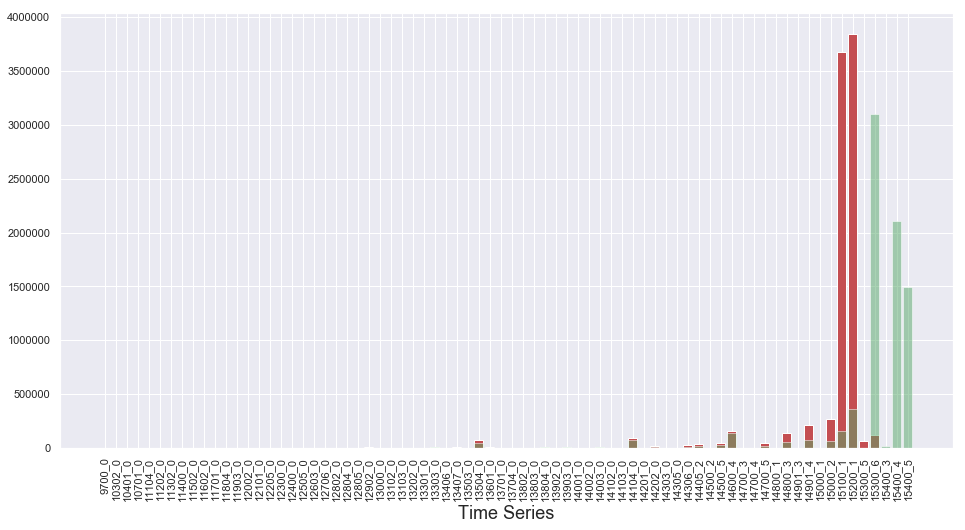

In [94]:
plt.figure(figsize=(16,8))
plt.bar(x=list(train_dict.keys()), height=list(train_dict.values()), color='r')
plt.bar(x=list(test_dict.keys()), height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical')
plt.xlabel('Time Series', fontsize=18)
plt.show();

### AppVersion

* $*.*.*.*$포맷
* 맨앞은 무조건 $4.*.*.*$

In [60]:
data.AppVersion.isna().any()

False

In [62]:
def get_app_version_2(app_version):
    return app_version.split('.')[1]

In [63]:
def get_app_version_3(app_version):
    return app_version.split('.')[2]

In [64]:
def get_app_version_4(app_version):
    return app_version.split('.')[3]

In [65]:
data['AppVersion_2'] = data.AppVersion.map(get_app_version_2)
data['AppVersion_3'] = data.AppVersion.map(get_app_version_3)
data['AppVersion_4'] = data.AppVersion.map(get_app_version_4)
data.AppVersion_2 = data.AppVersion_2.astype(int)
data.AppVersion_3 = data.AppVersion_3.astype(int)
data.AppVersion_4 = data.AppVersion_4.astype(int)

In [101]:
# meta idx
temp = data.groupby(['AppVersion_2', 'AppVersion_3', 'AppVersion_4']).size()
idx = []
for i in range(len(temp)):
    idx.append(str(temp.index.levels[0][temp.index.labels[0][i]]) + '_' + str(temp.index.levels[1][temp.index.labels[1][i]]) + '_' + str(temp.index.levels[2][temp.index.labels[2][i]]))

del temp
gc.collect()

0

In [103]:
# train_dict
temp = data[~data.HasDetections.isna()].groupby(['AppVersion_2', 'AppVersion_3', 'AppVersion_4']).size()
train_dict = {}
for v in idx:
    train_dict[v] = 0
    v1, v2, v3 = int(v.split('_')[0]), int(v.split('_')[1]), int(v.split('_')[2])
    try:
        train_dict[v] = temp[v1, v2, v3]
    except:
        pass

del temp
gc.collect()

29

In [105]:
# test_dict
temp = data[data.HasDetections.isna()].groupby(['AppVersion_2', 'AppVersion_3', 'AppVersion_4']).size()
test_dict = {}
for v in idx:
    test_dict[v] = 0
    v1, v2, v3 = int(v.split('_')[0]), int(v.split('_')[1]), int(v.split('_')[2])
    try:
        test_dict[v] = temp[v1, v2, v3]
    except:
        pass

del temp
gc.collect()

855

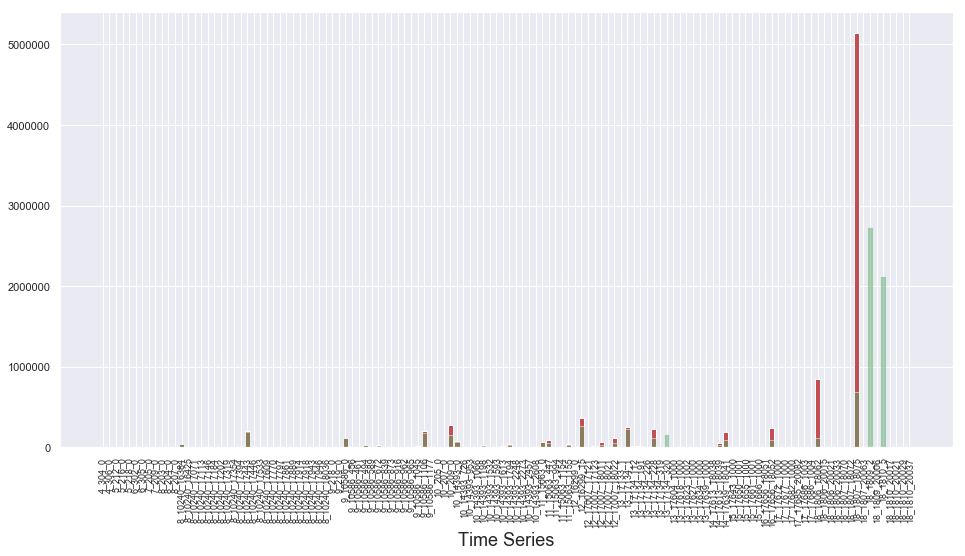

In [115]:
plt.figure(figsize=(16,8))
plt.bar(x=list(train_dict.keys()), height=list(train_dict.values()), color='r')
plt.bar(x=list(test_dict.keys()), height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=9)
plt.xlabel('Time Series', fontsize=18)
plt.show();

### AvSigVersion
* 너무 많아서 일단 보류

In [165]:
data[~data.AvSigVersion.str.contains('[0-9]*\.[0-9]*\.[0-9]*\.[0-9]*', regex=True)]

,EngineVersion,AppVersion,AvSigVersion,Platform,OsVer,OsBuild,OsPlatformSubRelease,OsBuildLab,IeVerIdentifier,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_FirmwareVersionIdentifier,HasDetections,EngineVersion_3,EngineVersion_4,AppVersion_2,AppVersion_3,AppVersion_4,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3
5244810,1.1.15100.1,4.18.1807.18075,1.2&#x17;3.1144.0,windows10,10.0.0.0,15063,rs2,15063.0.amd64fre.rs2_release.170317-1834,108.0,10.0.15063.1206,rs2_release,15063,1206,28079.0,1.0,15100,1,18,1807,18075,1,2&#x17;3,1144


In [119]:
def get_avsig_version_1(avsig_version):
    return avsig_version.split('.')[0]

In [120]:
def get_avsig_version_2(avsig_version):
    return avsig_version.split('.')[1]

In [121]:
def get_avsig_version_3(avsig_version):
    return avsig_version.split('.')[2]

In [177]:
# data['AvSigVersion_1'] = data.AvSigVersion.map(get_avsig_version_1)
# data['AvSigVersion_2'] = data.AvSigVersion.map(get_avsig_version_2)
# data['AvSigVersion_3'] = data.AvSigVersion.map(get_avsig_version_3)
# data.AvSigVersion_1 = data.AvSigVersion_1.astype(int)
# data.AvSigVersion_2 = data.AvSigVersion_2.astype(int)
# data.AvSigVersion_3 = data.AvSigVersion_3.astype(int)

In [178]:
# # meta idx
# temp = data.groupby(['AvSigVersion_1', 'AvSigVersion_2', 'AvSigVersion_3']).size()
# idx = []
# for i in range(len(temp)):
#     idx.append(str(temp.index.levels[0][temp.index.labels[0][i]]) + '_' + str(temp.index.levels[1][temp.index.labels[1][i]]) + '_' + str(temp.index.levels[2][temp.index.labels[2][i]]))

# del temp
# gc.collect()

In [179]:
# # train_dict
# temp = data[~data.HasDetections.isna()].groupby(['AvSigVersion_1', 'AvSigVersion_2', 'AvSigVersion_3']).size()
# train_dict = {}
# for v in idx:
#     train_dict[v] = 0
#     v1, v2, v3 = int(v.split('_')[0]), int(v.split('_')[1]), int(v.split('_')[2])
#     try:
#         train_dict[v] = temp[v1, v2, v3]
#     except:
#         pass

# del temp
# gc.collect()

In [180]:
# # test_dict
# temp = data[data.HasDetections.isna()].groupby(['AppVersion_2', 'AppVersion_3', 'AppVersion_4']).size()
# test_dict = {}
# for v in idx:
#     test_dict[v] = 0
#     v1, v2, v3 = int(v.split('_')[0]), int(v.split('_')[1]), int(v.split('_')[2])
#     try:
#         test_dict[v] = temp[v1, v2, v3]
#     except:
#         pass

# del temp
# gc.collect()

In [181]:
# plt.figure(figsize=(16,8))
# plt.bar(x=list(train_dict.keys()), height=list(train_dict.values()), color='r')
# plt.bar(x=list(test_dict.keys()), height=list(test_dict.values()), color='g', alpha=0.5)
# plt.xticks(rotation='vertical', fontsize=9)
# plt.xlabel('Time Series', fontsize=18)
# plt.show();

### Platform
* windows 10, 8, 7, 2016 이렇게 4개의 버전
* train, test 비슷

In [189]:
train.Platform.value_counts(dropna=False) / train.__len__()

windows10      0.966063
windows8       0.021802
windows7       0.010524
windows2016    0.001611
Name: Platform, dtype: float64

In [190]:
test.Platform.value_counts(dropna=False) / test.__len__()

windows10      0.977363
windows8       0.014204
windows7       0.007034
windows2016    0.001399
Name: Platform, dtype: float64

### OsVer
* train, test 비슷

In [193]:
data.OsVer.isna().any()

False

In [202]:
train.OsVer.value_counts(dropna=False).sort_values(ascending=False)[:6] / train.__len__()

10.0.0.0    0.967613
6.3.0.0     0.021795
6.1.1.0     0.010454
6.1.0.0     0.000065
10.0.3.0    0.000025
10.0.1.0    0.000016
Name: OsVer, dtype: float64

In [201]:
test.OsVer.value_counts(dropna=False).sort_values(ascending=False)[:6] / test.__len__()

10.0.0.0    0.978713
6.3.0.0     0.014200
6.1.1.0     0.006959
6.1.0.0     0.000073
10.0.3.0    0.000021
10.0.1.0    0.000014
Name: OsVer, dtype: float64

### OsBuild

In [203]:
data.OsBuild.isna().any()

False

In [217]:
idx = data.OsBuild.value_counts(dropna=False).sort_index().index

In [224]:
# # train_dict
temp = data[~data.HasDetections.isna()].OsBuild.value_counts(dropna=False).to_dict()

train_dict = {}

for v in idx:
    try:
        train_dict[v] = temp[v]
    except:
        train_dict[v] = 0

del temp
gc.collect()

199725

In [226]:
# # test_dict
temp = data[data.HasDetections.isna()].OsBuild.value_counts(dropna=False).to_dict()

test_dict = {}

for v in idx:
    try:
        test_dict[v] = temp[v]
    except:
        test_dict[v] = 0

del temp
gc.collect()

0

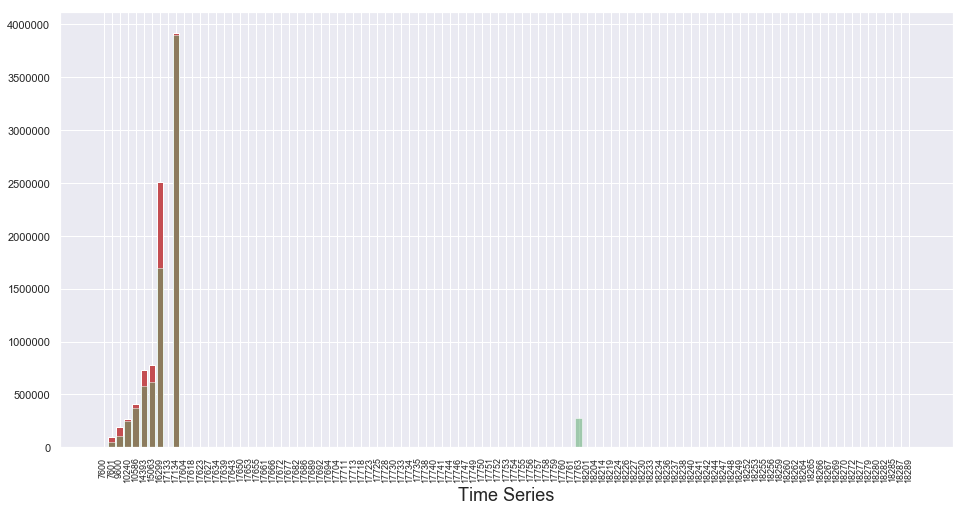

In [234]:
plt.figure(figsize=(16,8))
plt.bar(x=[str(v) for v in list(train_dict.keys())], height=list(train_dict.values()), color='r')
plt.bar(x=[str(v) for v in list(test_dict.keys())], height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=9)
plt.xlabel('Time Series', fontsize=18)
plt.show();

### OsPlatformSubRelease

In [237]:
data.OsPlatformSubRelease.isna().any()

False

In [239]:
train.OsPlatformSubRelease.value_counts(dropna=False).sort_values(ascending=False)[:6] / train.__len__()

rs4    0.438887
rs3    0.280635
rs2    0.087460
rs1    0.081917
th2    0.046136
th1    0.030286
Name: OsPlatformSubRelease, dtype: float64

In [240]:
test.OsPlatformSubRelease.value_counts(dropna=False).sort_values(ascending=False)[:6] / test.__len__()

rs4       0.495742
rs3       0.215272
rs2       0.078450
rs1       0.073291
th2       0.046777
prers5    0.037607
Name: OsPlatformSubRelease, dtype: float64

### OsBuildLab
- $'[0-9]*\.[0-9]*\..*\..*\.[0-9]*-[0-9]*'$

In [241]:
data.OsBuildLab.isna().any()

True

In [247]:
print("train null: ", np.sum(train.OsBuildLab.isna() * 1))
print("test null: ", np.sum(test.OsBuildLab.isna() * 1))

train null:  21
test null:  17


In [267]:
data[:1].OsBuildLab

0    17134.1.amd64fre.rs4_release.180410-1804
Name: OsBuildLab, dtype: object

In [294]:
data.OsBuildLab.fillna('NULL')[~data.OsBuildLab.fillna('NULL').str.contains('[0-9]*\.[0-9]*\..*\..*\.[0-9]*-[0-9]*', regex=True)]

70087                                          NULL
587482                                         NULL
988555                                         NULL
1485217                                        NULL
2487095                                        NULL
3064835                                        NULL
3526730                                        NULL
5100502                                        NULL
5523941                                        NULL
5768068                                        NULL
5837811                                        NULL
6453766                                        NULL
6512377                                        NULL
6542168                                        NULL
6598274                                        NULL
6653205                                        NULL
7087221                                        NULL
7471801                                        NULL
7975258                                        NULL
8214882     

In [306]:
data.loc[data.index == 6529507]

,EngineVersion,AppVersion,AvSigVersion,Platform,OsVer,OsBuild,OsPlatformSubRelease,OsBuildLab,IeVerIdentifier,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_FirmwareVersionIdentifier,HasDetections,EngineVersion_3,EngineVersion_4,AppVersion_2,AppVersion_3,AppVersion_4,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3
6529507,1.1.15100.1,4.18.1807.18075,1.273.127.0,windows10,10.0.0.0,16299,rs3,16299.431.amd64fre.rs3_release_svc_escrow.180502-1908,117.0,10.0.16299.492,rs3_release_svc_escrow,16299,492,16986.0,0.0,15100,1,18,1807,18075,1,273,127
6529507,1.1.15300.6,4.18.1809.2,1.277.1071.0,windows10,10.0.0.0,17134,rs4,17134.1.amd64fre.rs4_release.180410-1804,137.0,10.0.17134.112,rs4_release,17134,112,3941.0,NaN,15300,6,18,1809,2,1,277,1071


In [305]:
data.loc[(data.index == 6529507) & (data.HasDetections.isna()), 'OsBuildLab'] = '17134.1.amd64fre.rs4_release.180410-1804'

In [334]:
def get_os_build_lab_1(os_build_lab):
    try: 
        return int(os_build_lab.split('.')[0])
    except:
        return np.nan

In [335]:
def get_os_build_lab_2(os_build_lab):
    try: 
        return int(os_build_lab.split('.')[1])
    except:
        return np.nan

In [342]:
def get_os_build_lab_5(os_build_lab):
    try: 
        return os_build_lab.split('.')[4]
    except:
        return np.nan

In [343]:
def get_os_build_lab_date(os_build_lab_5):
    try:
        return int(os_build_lab_5.split('-')[0])
    except:
        return np.nan

In [357]:
def get_os_build_lab_version(os_build_lab_5):
    try:
        return int(os_build_lab_5.split('-')[1])
    except:
        return np.nan

In [365]:
data['os_build_lab_1'] = data.OsBuildLab.map(get_os_build_lab_1)
data['os_build_lab_2'] = data.OsBuildLab.map(get_os_build_lab_2)
data['os_build_lab_5'] = data.OsBuildLab.map(get_os_build_lab_5)
data['os_build_lab_date'] = data.os_build_lab_5.map(get_os_build_lab_date)
data['os_build_lab_version'] = data.os_build_lab_5.map(get_os_build_lab_version)
del data['os_build_lab_5']
gc.collect()

951

#### os_build_lab_1 (OsBuild From OsBuildLab)

In [380]:
idx = data.os_build_lab_1.value_counts(dropna=True).sort_index().index

In [381]:
# # train_dict
temp = data[~data.HasDetections.isna()].os_build_lab_1.value_counts(dropna=True).to_dict()

train_dict = {}

for v in idx:
    try:
        train_dict[v] = temp[v]
    except:
        train_dict[v] = 0

del temp
gc.collect()

349

In [382]:
# # test_dict
temp = data[data.HasDetections.isna()].os_build_lab_1.value_counts(dropna=True).to_dict()

test_dict = {}

for v in idx:
    try:
        test_dict[v] = temp[v]
    except:
        test_dict[v] = 0

del temp
gc.collect()

0

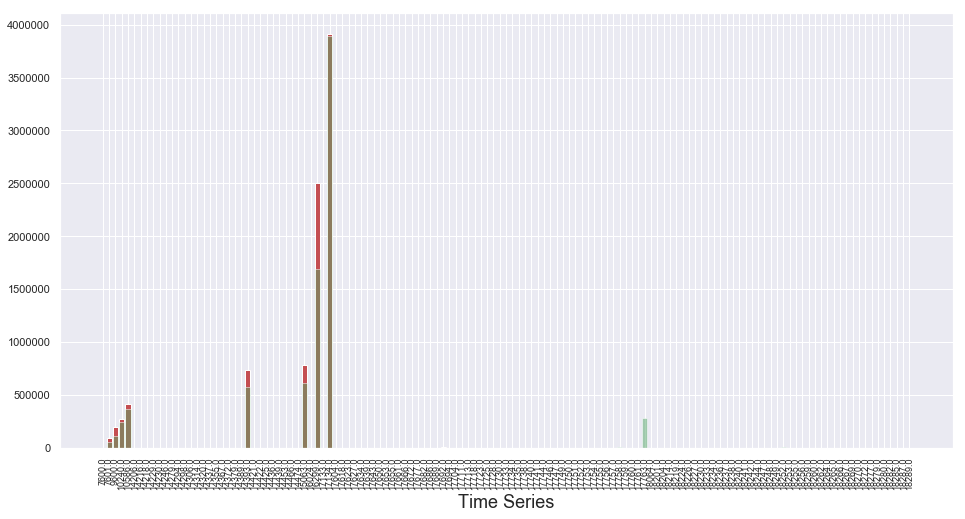

In [383]:
plt.figure(figsize=(16,8))
plt.bar(x=[str(v) for v in list(train_dict.keys())], height=list(train_dict.values()), color='r')
plt.bar(x=[str(v) for v in list(test_dict.keys())], height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=9)
plt.xlabel('Time Series', fontsize=18)
plt.show();

#### os_build_lab_date (OsBuildDate From OsBuildLab)

In [393]:
idx = data.os_build_lab_date.value_counts(dropna=True).sort_index().index[100:-20]

In [394]:
# # train_dict
temp = data[~data.HasDetections.isna()].os_build_lab_date.value_counts(dropna=True).to_dict()

train_dict = {}

for v in idx:
    try:
        train_dict[v] = temp[v]
    except:
        train_dict[v] = 0

del temp
gc.collect()

39569

In [395]:
# # test_dict
temp = data[data.HasDetections.isna()].os_build_lab_date.value_counts(dropna=True).to_dict()

test_dict = {}

for v in idx:
    try:
        test_dict[v] = temp[v]
    except:
        test_dict[v] = 0

del temp
gc.collect()

0

100 ~ -20 trim


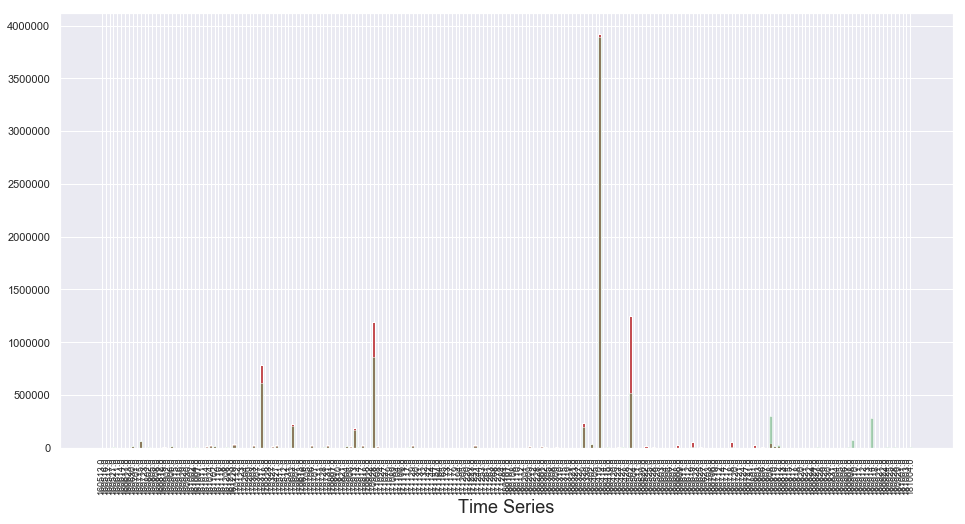

In [398]:
print('100 ~ -20 trim')
plt.figure(figsize=(16,8))
plt.bar(x=[str(v) for v in list(train_dict.keys())], height=list(train_dict.values()), color='r')
plt.bar(x=[str(v) for v in list(test_dict.keys())], height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=9)
plt.xlabel('Time Series', fontsize=18)
plt.show();

#### os_build_lab_version (OsBuildVersion From OsBuildLab)

In [407]:
idx = data.os_build_lab_version.value_counts(dropna=True).sort_index().index

In [403]:
# # train_dict
temp = data[~data.HasDetections.isna()].os_build_lab_version.value_counts(dropna=True).to_dict()

train_dict = {}

for v in idx:
    try:
        train_dict[v] = temp[v]
    except:
        train_dict[v] = 0

del temp
gc.collect()

0

In [404]:
# # test_dict
temp = data[data.HasDetections.isna()].os_build_lab_version.value_counts(dropna=True).to_dict()

test_dict = {}

for v in idx:
    try:
        test_dict[v] = temp[v]
    except:
        test_dict[v] = 0

del temp
gc.collect()

0

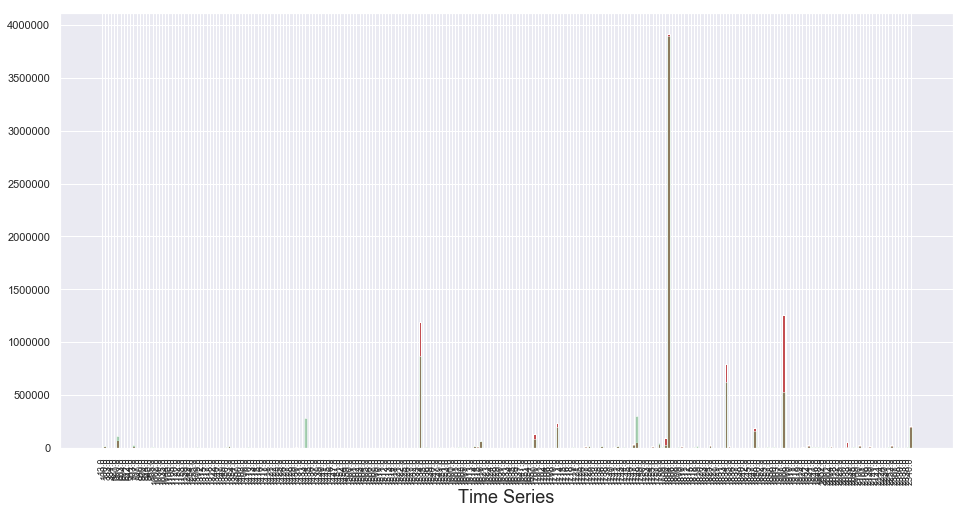

In [405]:
plt.figure(figsize=(16,8))
plt.bar(x=[str(v) for v in list(train_dict.keys())], height=list(train_dict.values()), color='r')
plt.bar(x=[str(v) for v in list(test_dict.keys())], height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=9)
plt.xlabel('Time Series', fontsize=18)
plt.show();

### IeVerIdentifier

In [409]:
data.IeVerIdentifier.isna().any()

True

In [410]:
print("train null: ", np.sum(train.IeVerIdentifier.isna() * 1))
print("test null: ", np.sum(test.IeVerIdentifier.isna() * 1))

train null:  58894
test null:  49796


In [422]:
train.IeVerIdentifier.value_counts(dropna=False).sort_values(ascending=False).iloc[:5] / train.__len__()

137.0    0.435560
117.0    0.198166
108.0    0.053174
111.0    0.052438
98.0     0.039726
Name: IeVerIdentifier, dtype: float64

In [423]:
test.IeVerIdentifier.value_counts(dropna=False).sort_values(ascending=False).iloc[:5] / test.__len__()

137.0    0.492484
117.0    0.138773
111.0    0.050266
108.0    0.047376
98.0     0.037140
Name: IeVerIdentifier, dtype: float64

In [434]:
idx = data.IeVerIdentifier.value_counts(dropna=True).sort_index().index[20:-60]

In [435]:
# # train_dict
temp = data[~data.HasDetections.isna()].IeVerIdentifier.value_counts(dropna=True).to_dict()

train_dict = {}

for v in idx:
    try:
        train_dict[v] = temp[v]
    except:
        train_dict[v] = 0

del temp
gc.collect()

52929

In [436]:
# # test_dict
temp = data[data.HasDetections.isna()].IeVerIdentifier.value_counts(dropna=True).to_dict()

test_dict = {}

for v in idx:
    try:
        test_dict[v] = temp[v]
    except:
        test_dict[v] = 0

del temp
gc.collect()

0

20 ~ -60 trim


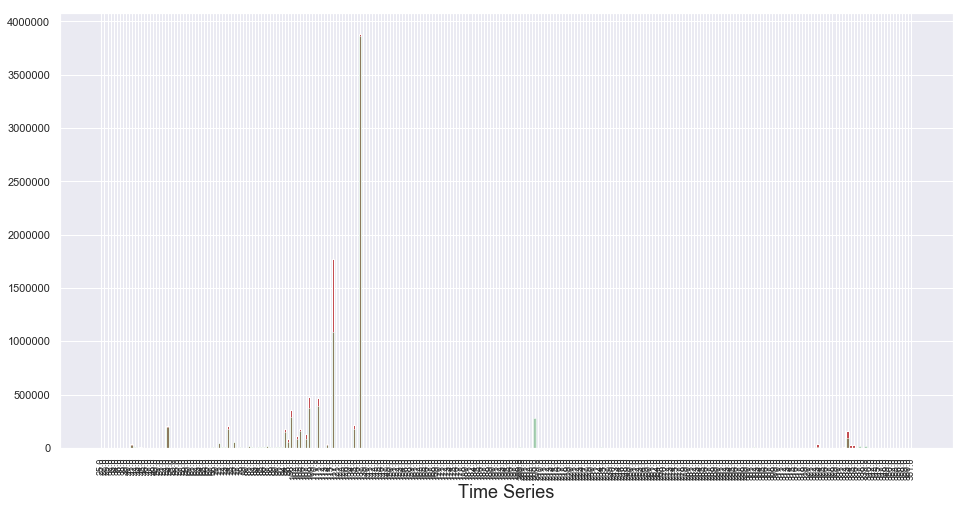

In [439]:
print("20 ~ -60 trim")
plt.figure(figsize=(16,8))
plt.bar(x=[str(v) for v in list(train_dict.keys())], height=list(train_dict.values()), color='r')
plt.bar(x=[str(v) for v in list(test_dict.keys())], height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=9)
plt.xlabel('Time Series', fontsize=18)
plt.show();

### Census_OSVersion
* Census_OSBuildNumber와 Census_OSBuildRevision과 중복 정보

### Census_OSBranch

In [451]:
data.Census_OSBranch.isna().any()

False

In [452]:
train.Census_OSBranch.value_counts(dropna=False).sort_values(ascending=False)[:6] / train.__len__()

rs4_release               0.449382
rs3_release               0.138690
rs3_release_svc_escrow    0.134481
rs2_release               0.089342
rs1_release               0.088050
th2_release               0.036614
Name: Census_OSBranch, dtype: float64

In [453]:
test.Census_OSBranch.value_counts(dropna=False).sort_values(ascending=False)[:6] / test.__len__()

rs4_release               0.506687
rs3_release               0.143590
rs2_release               0.079801
rs1_release               0.076900
rs3_release_svc_escrow    0.063161
rs5_release               0.037005
Name: Census_OSBranch, dtype: float64

### Census_OSBuildNumber

In [455]:
data.Census_OSBuildNumber.isna().any()

False

In [456]:
idx = data.Census_OSBuildNumber.value_counts(dropna=False).sort_index().index

In [457]:
# # train_dict
temp = data[~data.HasDetections.isna()].Census_OSBuildNumber.value_counts(dropna=True).to_dict()

train_dict = {}

for v in idx:
    try:
        train_dict[v] = temp[v]
    except:
        train_dict[v] = 0

del temp
gc.collect()

93183

In [458]:
# # test_dict
temp = data[data.HasDetections.isna()].Census_OSBuildNumber.value_counts(dropna=True).to_dict()

test_dict = {}

for v in idx:
    try:
        test_dict[v] = temp[v]
    except:
        test_dict[v] = 0

del temp
gc.collect()

0

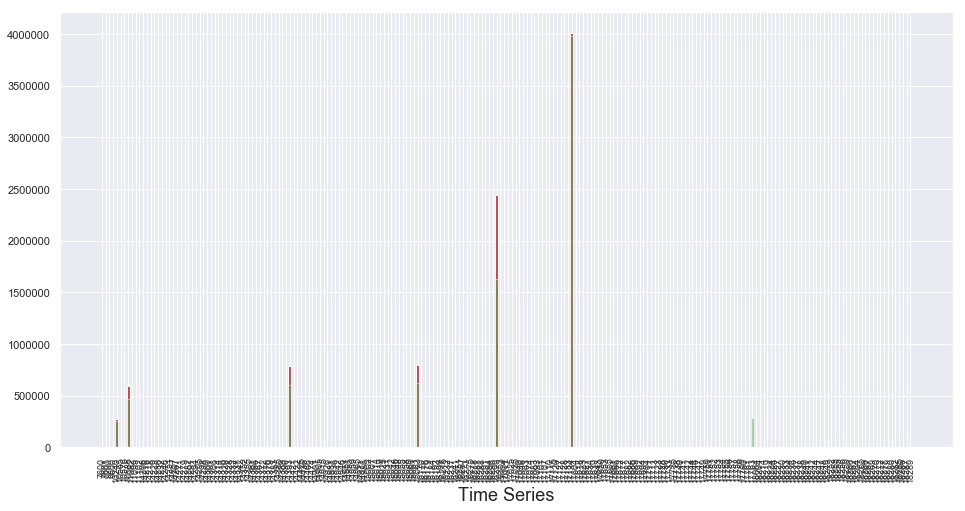

In [459]:
plt.figure(figsize=(16,8))
plt.bar(x=[str(v) for v in list(train_dict.keys())], height=list(train_dict.values()), color='r')
plt.bar(x=[str(v) for v in list(test_dict.keys())], height=list(test_dict.values()), color='g', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=9)
plt.xlabel('Time Series', fontsize=18)
plt.show();

### Census_FirmwareVersionIdentifier

In [440]:
data.Census_FirmwareVersionIdentifier.isna().any()

True

In [441]:
print("train null: ", np.sum(train.Census_FirmwareVersionIdentifier.isna() * 1))
print("test null: ", np.sum(test.Census_FirmwareVersionIdentifier.isna() * 1))

train null:  160133
test null:  177624


In [443]:
data.Census_FirmwareVersionIdentifier.unique().__len__()

58958

In [442]:
train.Census_FirmwareVersionIdentifier.value_counts(dropna=False).sort_values(ascending=False).iloc[:5] / train.__len__()

NaN         0.017949
 33105.0    0.010044
 33111.0    0.006903
 33054.0    0.006347
 33108.0    0.006169
Name: Census_FirmwareVersionIdentifier, dtype: float64

In [444]:
test.Census_FirmwareVersionIdentifier.value_counts(dropna=False).sort_values(ascending=False).iloc[:5] / test.__len__()

NaN         0.022618
 33105.0    0.009225
 33054.0    0.006677
 11778.0    0.006597
 33111.0    0.005955
Name: Census_FirmwareVersionIdentifier, dtype: float64

## OsBuild + OsRevision 정보 조합해서 날짜 찾기

- OsBuild => OsBuild, os_build_lab_1, Census_OSBuildNumber
- OsRevision => os_build_lab_2, Census_OSBuildRevision

- https://support.microsoft.com/ko-kr/help/4000825 (윈도우10 빌드 릴리즈 정보)